## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
from datetime import datetime

In [2]:
data = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [3]:
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


## Dataset overview

### Shape

In [4]:
data.shape

(150500, 13)

### Missing values

In [5]:
data.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

We have one missing value for `PdDistrict` so we need to fill it. We are going to use mode of other example's `PdDistrict` values.

In [6]:
data['PdDistrict'].fillna(data['PdDistrict'].mode()[0], inplace=True)

In [7]:
data.isnull().any().any()

False

Now we don't have any missing values.

## Visualization

### Categories count plot

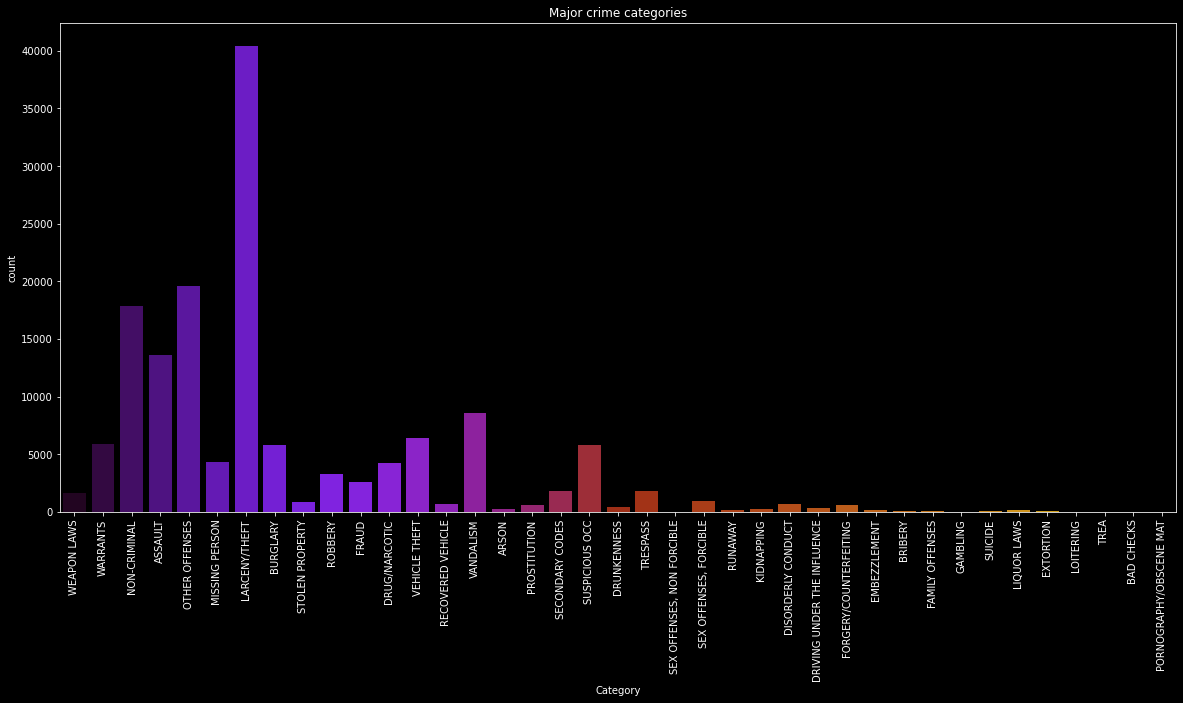

In [8]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')
sns.countplot(data['Category'], palette='gnuplot')
plt.xticks(rotation = 90)
plt.title("Major crime categories")
plt.show()

<span style="color:red">**Conclusion**: The most common type of crime is Larceny/Theft.</span>

### District with most crime

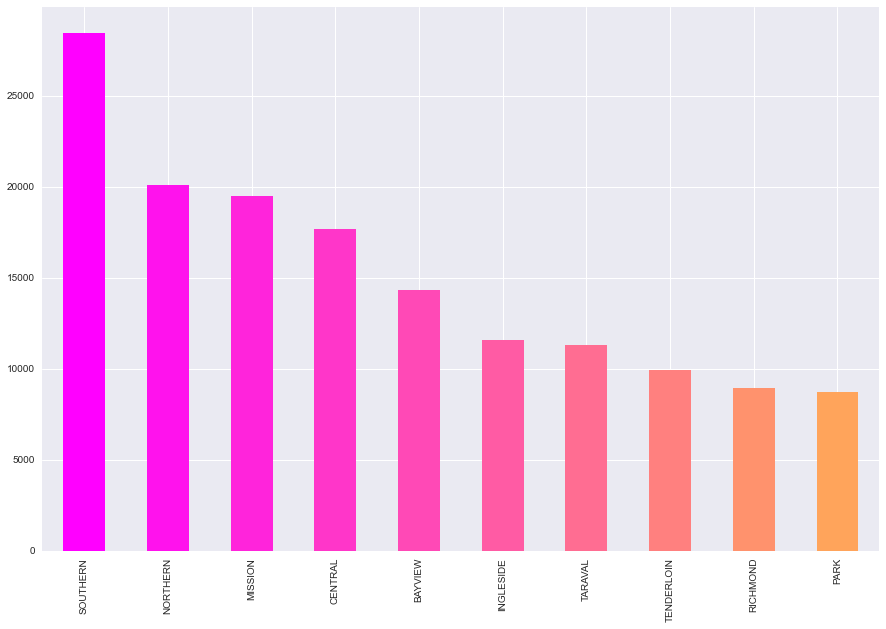

In [9]:
plt.style.use('seaborn')
data['PdDistrict'].value_counts().plot.bar(color = plt.cm.spring(np.linspace(0, 1, 15)), figsize = (15, 10))
plt.show()


<span style="color:red">**Conclusion**: Most crime happens in the Southern region of San Francisco.</span>


### Period of day for crime

Mappin the timestamps to hours for more convinient representation

In [10]:
data['Time_ByHours'] = data['Time'].map(lambda timestamp: timestamp.split(':')[0])

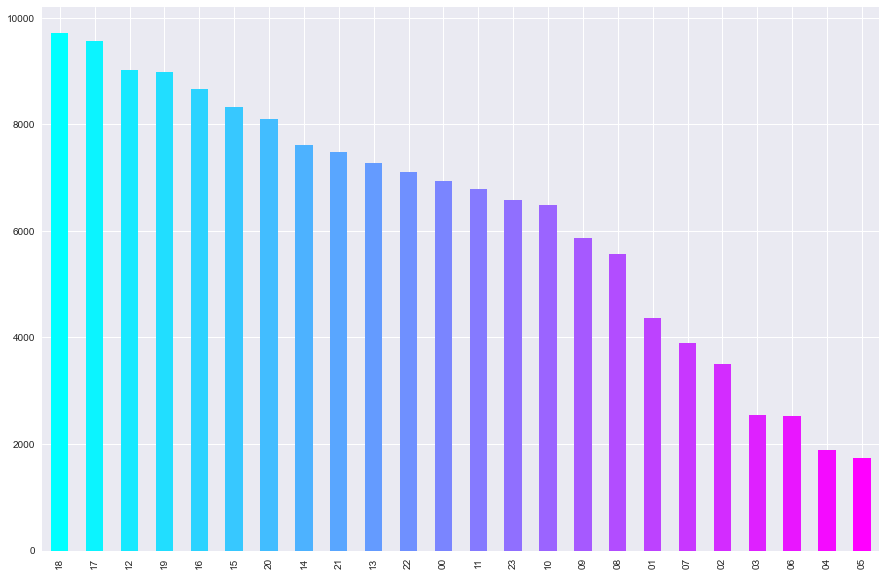

In [11]:
plt.style.use('seaborn')
data['Time_ByHours'].value_counts().plot.bar(color = plt.cm.cool(np.linspace(0, 1, 24)), figsize = (15, 10))
plt.show()

In [12]:
data['Time_ByHours'].value_counts().values

array([9718, 9559, 9021, 8981, 8656, 8329, 8098, 7621, 7480, 7268, 7099,
       6941, 6786, 6573, 6483, 5865, 5575, 4359, 3894, 3494, 2553, 2518,
       1885, 1744], dtype=int64)

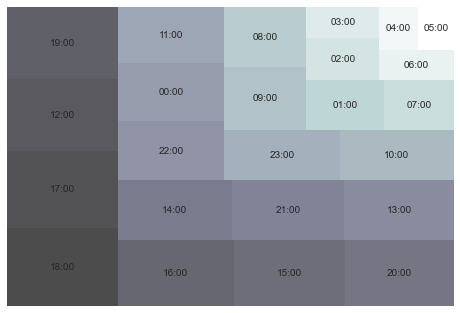

In [13]:
squarify.plot(sizes=data['Time_ByHours'].value_counts().values, label=data['Time_ByHours'].value_counts().keys().map(lambda hour: hour +":00"), alpha=.7, color=plt.cm.bone(np.linspace(0, 1, 24)) )
plt.axis('off')
plt.show()

<span style="color:red">**Conclusion**: Most of the crimes happen arround 18:00 o'clock.</span>

### Crime description

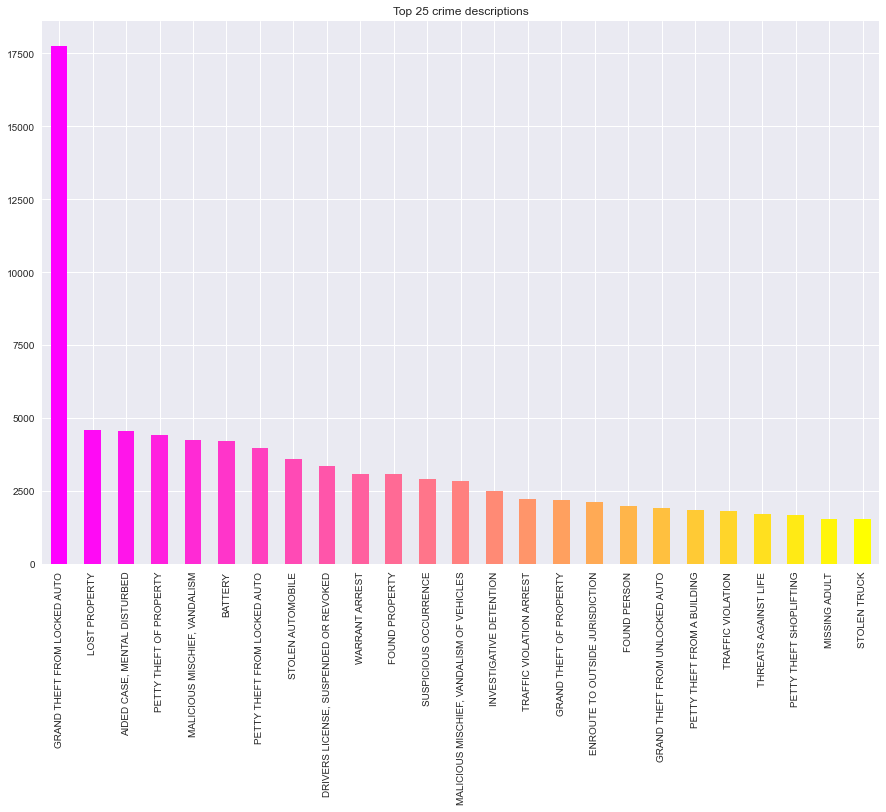

In [14]:
top_n = 25

data['Descript'].value_counts()[:top_n].plot.bar(color = plt.cm.spring(np.linspace(0, 1, top_n)), figsize = (15, 10))
plt.title("Top {} crime descriptions".format(top_n))
plt.show()

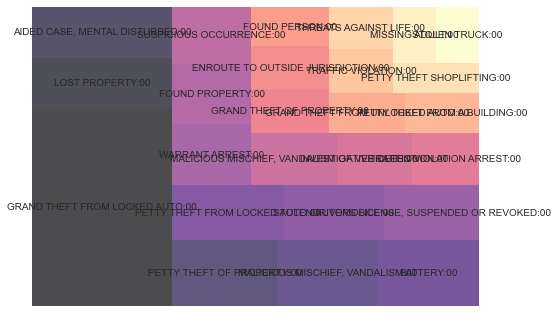

In [15]:
squarify.plot(sizes=data['Descript'].value_counts()[:top_n].values, label=data['Descript'].value_counts()[:top_n].keys().map(lambda hour: hour +":00"), alpha=.7, color=plt.cm.magma(np.linspace(0, 1, top_n)),text_kwargs={'wrap':True} )
plt.axis('off')
plt.show()

<span style="color:red">**Conclusion**: Most of popular crime category is Grand theft from locked auto.</span>

### Day of week

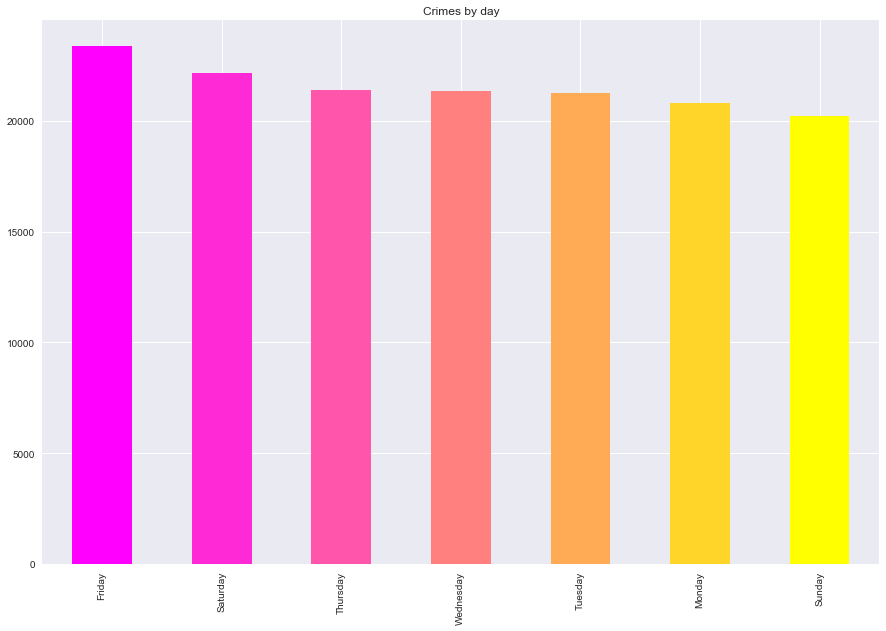

In [16]:
data['DayOfWeek'].value_counts().plot.bar(color = plt.cm.spring(np.linspace(0, 1, 7)), figsize = (15, 10))
plt.title("Crimes by day")
plt.show()

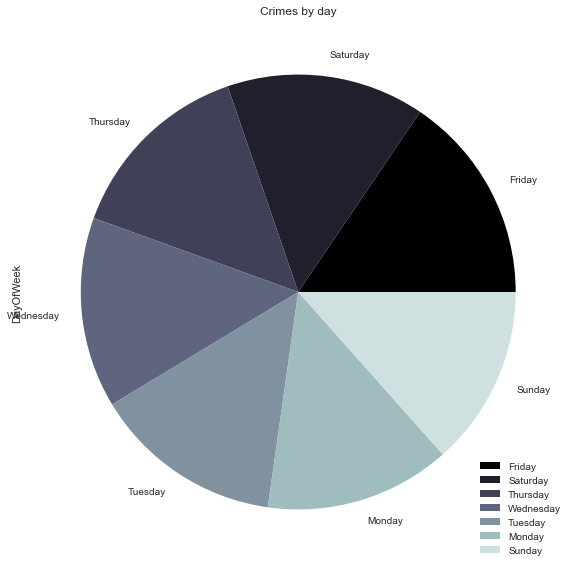

In [17]:
plot = pd.DataFrame(data['DayOfWeek'].value_counts()).plot.pie(title="Crimes by day",y='DayOfWeek', figsize=(10, 10),colors = plt.cm.bone(np.linspace(0, 1, 8)))

<span style="color:red">**Conclusion**: Most of the crimes happen in Friday.</span>

### Crimes by month

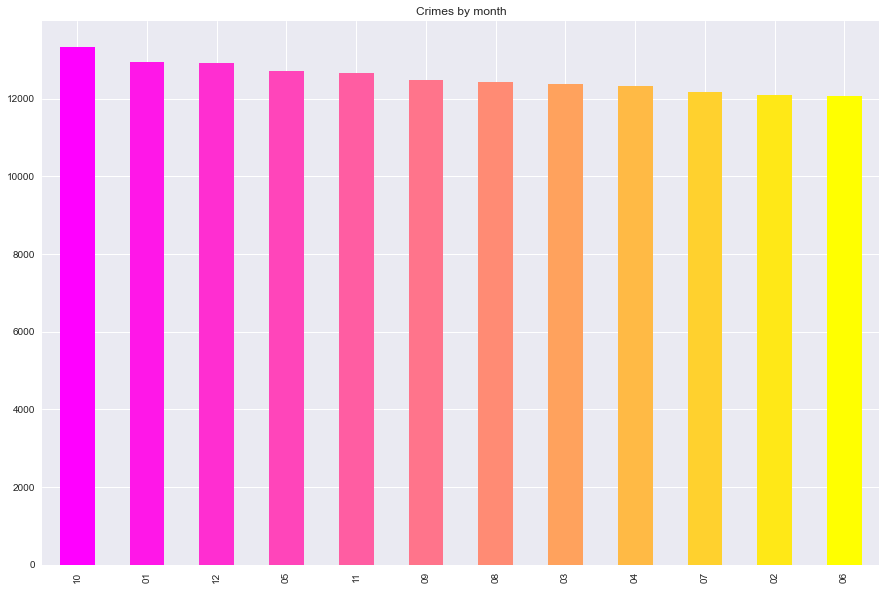

In [18]:
data['Month'] = data['Date'].map(lambda date: date.split(" ")[0].split("/")[0])
data['Month'].value_counts().plot.bar(color = plt.cm.spring(np.linspace(0, 1, 12)), figsize = (15, 10))
plt.title("Crimes by month")
plt.show()

<span style="color:red">**Conclusion**: Most of the crimes happen in October.</span>